# Washing machine 

This notebook will cover the data analysis and modelling of the historical data of the washing machine in Sundmolen A36. Furthermore, it will implement a UI that guides the end-user to financially optimise their consumption.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('WM/Vaske_MeterReading_A36.csv').iloc[:,[0,1]]  #Reads csv file with accumlated energy [kWh]
df.loc[:,'timestamp'] = pd.to_datetime(df['timestamp'],format="%Y-%m-%dT%H:%M:%S.%fZ") #changes timestamps to date objects
df.set_index('timestamp',inplace=True) #sets index to timestamp


#accumaleted energy -> difference between each timestamp
df2=df.diff(1).dropna()*1/1000 # from Wh to kWh
### we now have a dataset with the energy consumption ###




Once the data has been loaded, an analysis of the data is needed.
For this the data is filtered into seasonal and weekly patterns. The key feature of the data has been decided to be the total energy consumption in a day.

Text(0.5, 1.0, 'Kernel Density Estimation - Fall')

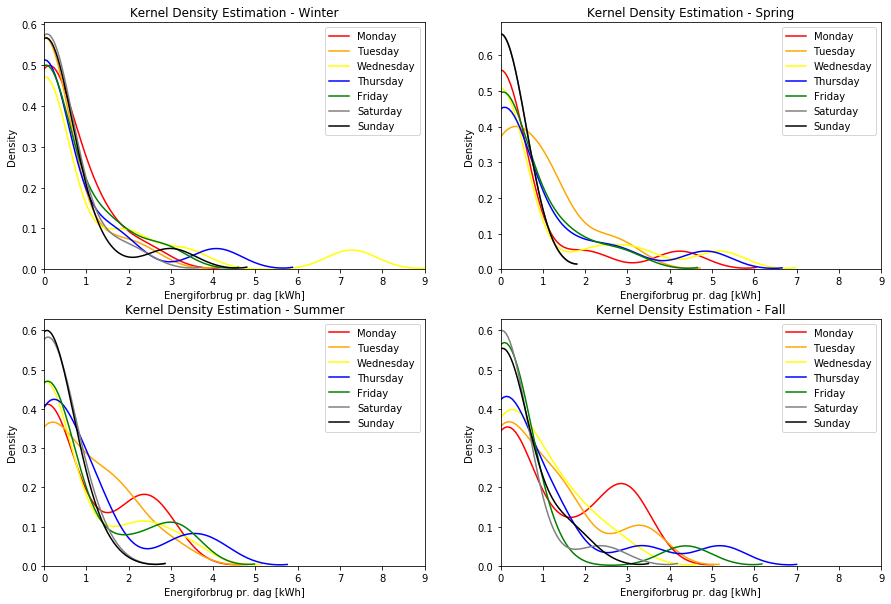

In [81]:
#The resolution is changed to a day.
df2day=df2.resample('d').sum()

#The name of the attribute containing the daily energy usage is renamed.
df2day.rename({'Vaskermaskine_MeterReading_B': 'energy'}, axis=1, inplace=True)
#df2day = df2day.query('energy > 0.1')

#In order of filtering the historical data based on season and weekday the following is done:
#Splits df2quar into seasons
winter_months = [12, 1, 2]
spring_months = [3,4,5]
summer_months = [6,7,8]
fall_months = [9,10,11]
dfw = df2day[df2day.index.map(lambda t: t.month in winter_months)]
dfsp = df2day[df2day.index.map(lambda t: t.month in spring_months)]
dfsu = df2day[df2day.index.map(lambda t: t.month in summer_months)]
dff = df2day[df2day.index.map(lambda t: t.month in fall_months)]

#SOMMER ugedage
dfsumon = dfsu[dfsu.index.weekday==0]
dfsutue = dfsu[dfsu.index.weekday==1]
dfsuwed = dfsu[dfsu.index.weekday==2]
dfsuthu = dfsu[dfsu.index.weekday==3]
dfsufri = dfsu[dfsu.index.weekday==4]
dfsusat = dfsu[dfsu.index.weekday==5]
dfsusun = dfsu[dfsu.index.weekday==6]

#Vinter ugedage
dfwmon = dfw[dfw.index.weekday==0]
dfwtue = dfw[dfw.index.weekday==1]
dfwwed = dfw[dfw.index.weekday==2]
dfwthu = dfw[dfw.index.weekday==3]
dfwfri = dfw[dfw.index.weekday==4]
dfwsat = dfw[dfw.index.weekday==5]
dfwsun = dfw[dfw.index.weekday==6]

#Spring ugedage
dfspmon = dfsp[dfsp.index.weekday==0]
dfsptue = dfsp[dfsp.index.weekday==1]
dfspwed = dfsp[dfsp.index.weekday==2]
dfspthu = dfsp[dfsp.index.weekday==3]
dfspfri = dfsp[dfsp.index.weekday==4]
dfspsat = dfsp[dfsp.index.weekday==5]
dfspsun = dfsp[dfsp.index.weekday==6]

#Fall ugedage
dffmon = dff[dff.index.weekday==0]
dfftue = dff[dff.index.weekday==1]
dffwed = dff[dff.index.weekday==2]
dffthu = dff[dff.index.weekday==3]
dfffri = dff[dff.index.weekday==4]
dffsat = dff[dff.index.weekday==5]
dffsun = dff[dff.index.weekday==6]

#The data can now be plotted in a KDE plot. (Kernel Density estimation)
#If the data were to be plotted as a histogram it would not be possible to extract any information since all the boxes
#would be on top of each other.
#The KDE works by taking each observation and making it to a gaussian distribution with the observed value as the center.
#Afterwards these curves are summed to compute the value of the density at each point. The resulting curve is then normalised
#such that the area under is equal to 1. 



f, axes = plt.subplots(2, 2,figsize=(15,10))
#kwargs = dict(bins=10,hist_kws={'alpha':.3}, kde_kws={'linewidth':2})
kwargs = dict(bw = 0.6)
#winter

sns.kdeplot(dfwmon.loc[:,'energy'], color="r", label="Monday", **kwargs,ax=axes[0,0])
sns.kdeplot(dfwtue.loc[:,'energy'], color="orange", label="Tuesday", **kwargs,ax=axes[0,0])
sns.kdeplot(dfwwed.loc[:,'energy'], color="yellow", label="Wednesday", **kwargs,ax=axes[0,0])
sns.kdeplot(dfwthu.loc[:,'energy'], color="blue", label="Thursday", **kwargs,ax=axes[0,0])
sns.kdeplot(dfwfri.loc[:,'energy'], color="green", label="Friday", **kwargs,ax=axes[0,0])
sns.kdeplot(dfwsat.loc[:,'energy'], color="grey", label="Saturday", **kwargs,ax=axes[0,0])
sns.kdeplot(dfwsun.loc[:,'energy'], color="black", label="Sunday", **kwargs,ax=axes[0,0])


#spring
sns.kdeplot(dfspmon.loc[:,'energy'], color="r", label="Monday", **kwargs,ax=axes[0,1])
sns.kdeplot(dfsptue.loc[:,'energy'], color="orange", label="Tuesday", **kwargs,ax=axes[0,1])
sns.kdeplot(dfspwed.loc[:,'energy'], color="yellow", label="Wednesday", **kwargs,ax=axes[0,1])
sns.kdeplot(dfspthu.loc[:,'energy'], color="blue", label="Thursday", **kwargs,ax=axes[0,1])
sns.kdeplot(dfspfri.loc[:,'energy'], color="green", label="Friday", **kwargs,ax=axes[0,1])
sns.kdeplot(dfspsat.loc[:,'energy'], color="grey", label="Saturday", **kwargs,ax=axes[0,1])
sns.kdeplot(dfspsun.loc[:,'energy'], color="black", label="Sunday", **kwargs,ax=axes[0,1])

#summer
sns.kdeplot(dfsumon.loc[:,'energy'], color="r", label="Monday", **kwargs,ax=axes[1,0])
sns.kdeplot(dfsutue.loc[:,'energy'], color="orange", label="Tuesday", **kwargs,ax=axes[1,0])
sns.kdeplot(dfsuwed.loc[:,'energy'], color="yellow", label="Wednesday", **kwargs,ax=axes[1,0])
sns.kdeplot(dfsuthu.loc[:,'energy'], color="blue", label="Thursday", **kwargs,ax=axes[1,0])
sns.kdeplot(dfsufri.loc[:,'energy'], color="green", label="Friday", **kwargs,ax=axes[1,0])
sns.kdeplot(dfsusat.loc[:,'energy'], color="grey", label="Saturday", **kwargs,ax=axes[1,0])
sns.kdeplot(dfsusun.loc[:,'energy'], color="black", label="Sunday", **kwargs,ax=axes[1,0])

#fall

sns.kdeplot(dffmon.loc[:,'energy'], color="r", label="Monday", **kwargs,ax=axes[1,1])
sns.kdeplot(dfftue.loc[:,'energy'], color="orange", label="Tuesday", **kwargs,ax=axes[1,1])
sns.kdeplot(dffwed.loc[:,'energy'], color="yellow", label="Wednesday", **kwargs,ax=axes[1,1])
sns.kdeplot(dffthu.loc[:,'energy'], color="blue", label="Thursday", **kwargs,ax=axes[1,1])
sns.kdeplot(dfffri.loc[:,'energy'], color="green", label="Friday", **kwargs,ax=axes[1,1])
sns.kdeplot(dffsat.loc[:,'energy'], color="grey", label="Saturday", **kwargs,ax=axes[1,1])
sns.kdeplot(dffsun.loc[:,'energy'], color="black", label="Sunday", **kwargs,ax=axes[1,1])

for ax in axes.flat:
    ax.set(xlabel='Energiforbrug pr. dag [kWh]', ylabel='Density')
    ax.legend()
    ax.set_xlim([0,9 ])
    
    
axes[0,0].set_title('Kernel Density Estimation - Winter')
axes[0,1].set_title('Kernel Density Estimation - Spring')
axes[1,0].set_title('Kernel Density Estimation - Summer')
axes[1,1].set_title('Kernel Density Estimation - Fall')


The distribution can be seen on the KDE plots.

It can be seen that many of the days the WM has not been used. 
However, a seasonal dependency can be seen since the number KDE has a bigger "tail" in the winter months. 
It can also be seen that the apartment mostly uses the WM during the week and not in the weekends.

We now want to check whether each day is significantly different from each other.
Since only approx. 13 observations are available for each weekday/season we can not assume that the observations has a normal distribution. Hence we can use non-paramatric bootstrapping to find a confidence interval for the mean. Non-parametric bootstrapping means that we dont assume a distribution (gaussian, gamma etc.)



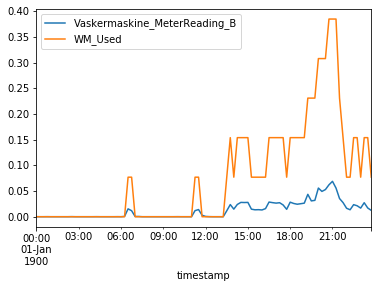

In [78]:
#Next goal is to find the pattern for a "typical" day based on which weekday and season it is.
#The resolution is changed to 15 minutes.
df2quar=df2.resample('15T').sum()

#Makes a new column indicating whether or not the WM was ON.
WM_Usedquar = (df2quar.Vaskermaskine_MeterReading_B > 0.05)
df2quar['WM_Used'] = WM_Usedquar
df2quar.head()

#In order of filtering the historical data based on season and weekday the following is done:
#Splits df2quar into seasons
winter_months = [12, 1, 2]
spring_months = [3,4,5]
summer_months = [6,7,8]
fall_months = [9,10,11]
df2quarw = df2quar[df2quar.index.map(lambda t: t.month in winter_months)]
df2quarsp = df2quar[df2quar.index.map(lambda t: t.month in spring_months)]
df2quarsu = df2quar[df2quar.index.map(lambda t: t.month in summer_months)]
df2quarf = df2quar[df2quar.index.map(lambda t: t.month in fall_months)]




'''The goal is now to make a data base such that if you have a weekday and a month a prediction of the WM usage is given'''

dfwinter = pd.DataFrame(columns = ['Tid','Brugt','Antal']) #Init the data base df
dfsummer = pd.DataFrame(columns = ['Tid','Brugt','Antal'])
dfspring = pd.DataFrame(columns = ['Tid','Brugt','Antal'])
dffall = pd.DataFrame(columns = ['Tid','Brugt','Antal'])
avgcons =0.7 #Set the average consumption for one washing machine program to 0.7 kWh. Used in later calculations

'''
This for loop runs through each weekday (0-6, 0 =monday ...)
The idea is that a "typical" weekday in a given season will be calculated thus important results such as when the WM is
most likely to be used (the time), how many kWh the WM consumes on a typical day, and finally an average number of times the WM
is running
'''


for i in range(0,7): 
    #Winter
    df2quarw_day = df2quarw[df2quarw.index.weekday==i] #Selects the weekday
    df_typday =df2quarw_day.groupby([df2quarw_day.index.hour,df2quarw_day.index.minute]).mean() #Finds the typical day
    df_typday.index = pd.to_datetime(df_typday.index.get_level_values(0).astype(str) + ' ' +
               df_typday.index.get_level_values(1).astype(str),
               format='%H %M') # Resets the index from multiindex to single index.
    dfwinter.loc[i, ['Tid']] = df_typday['WM_Used'].idxmax() #finds the index (time) when the WM is used most
    dfwinter.loc[i, ['Brugt']] = df_typday['Vaskermaskine_MeterReading_B'].sum() #finds the total consumption of a typical day
    dfwinter.loc[i, ['Antal']] = df_typday['Vaskermaskine_MeterReading_B'].sum()/avgcons #finds the average number of times it runs
    
    #Summer
    df2quarsu_day = df2quarsu[df2quarsu.index.weekday==i]
    df_typday =df2quarsu_day.groupby([df2quarsu_day.index.hour,df2quarsu_day.index.minute]).mean()
    df_typday.index = pd.to_datetime(df_typday.index.get_level_values(0).astype(str) + ' ' +
               df_typday.index.get_level_values(1).astype(str),
               format='%H %M')
    dfsummer.loc[i, ['Tid']] = df_typday['WM_Used'].idxmax()
    dfsummer.loc[i, ['Brugt']] = df_typday['Vaskermaskine_MeterReading_B'].sum()
    dfsummer.loc[i, ['Antal']] = df_typday['Vaskermaskine_MeterReading_B'].sum()/avgcons
    
    #Spring
    df2quarsp_day = df2quarsp[df2quarsp.index.weekday==i]
    df_typday =df2quarsp_day.groupby([df2quarsp_day.index.hour,df2quarsp_day.index.minute]).mean()
    df_typday.index = pd.to_datetime(df_typday.index.get_level_values(0).astype(str) + ' ' +
               df_typday.index.get_level_values(1).astype(str),
               format='%H %M')
    dfspring.loc[i, ['Tid']] = df_typday['WM_Used'].idxmax()
    dfspring.loc[i, ['Brugt']] = df_typday['Vaskermaskine_MeterReading_B'].sum()    
    dfspring.loc[i, ['Antal']] = df_typday['Vaskermaskine_MeterReading_B'].sum()/avgcons
    
    #Fall
    df2quarf_day = df2quarf[df2quarf.index.weekday==i]
    df_typday =df2quarf_day.groupby([df2quarf_day.index.hour,df2quarf_day.index.minute]).mean()
    df_typday.index = pd.to_datetime(df_typday.index.get_level_values(0).astype(str) + ' ' +
               df_typday.index.get_level_values(1).astype(str),
               format='%H %M')
    dffall.loc[i, ['Tid']] = df_typday['WM_Used'].idxmax()
    dffall.loc[i, ['Brugt']] = df_typday['Vaskermaskine_MeterReading_B'].sum()
    dffall.loc[i, ['Antal']] = df_typday['Vaskermaskine_MeterReading_B'].sum()/avgcons
    


#The data base has now been generated.
#A plot of how the dataframe looks like can be seen.
df2quarf_day = df2quarf[df2quarf.index.weekday==0]
df_typday =df2quarf_day.groupby([df2quarf_day.index.hour,df2quarf_day.index.minute]).mean()
df_typday.index = pd.to_datetime(df_typday.index.get_level_values(0).astype(str) + ' ' +
           df_typday.index.get_level_values(1).astype(str),
           format='%H %M')
df_typday.plot()
#The time when the WM is most likely to run is based on the highest value of 'WM_Used', the energy consumption is a sum of
#the area under the blue graph. 

#We now need functions to access the relevant data.


In [97]:
#Method for returning the weekday (0-6) and the season (spring = 0, summer = 1, fall = 2, winter =3) of TODAY
import calendar
from datetime import datetime

today = datetime.today()

def getWeekday():
    month = today.month
    if 2 < month <=5:
        season =0
    elif 5 < month <= 8:
        season = 1
    elif 8 < month <= 11:
        seaspn = 2
    else:
        season = 3       
    return today.weekday(),season


#Method for returning at what time they are most likely to use the WM, how much electricity is consumed and how many times
#the WM runs

def getPrediction(weekday,season):
    if season == 0:
        for i in range(0,7):
            if i == weekday:
                return dfspring['Tid'][i],dfspring['Brugt'][i],dfspring['Antal'][i]
    elif season == 1:
        for i in range(0,7):
            if i == weekday:
                return dfsummer['Tid'][i],dfsummer['Brugt'][i],dfsummer['Antal'][i]
    elif season == 2:
        for i in range(0,7):
            if i == weekday:
                return dffall['Tid'][i],dffall['Brugt'][i],dffall['Antal'][i]
    elif season == 3:
        for i in range(0,7):
            if i == weekday:
                return dfwinter['Tid'][i],dfwinter['Brugt'][i],dfwinter['Antal'][i]

            
#result = getPrediction(getWeekday()[0],getWeekday()[1])     #Uses todays date    
result = getPrediction(3,0) 
print(result[0]) #TIDSPUNKT
print(result[1]) #kWh BRUGT
print(result[2]) #ANTAL KØRSLER


#We have now extracted the relevant information to continue our calculations for the end-user



1900-01-01 18:30:00
0.8495384615384616
1.2136263736263737


In [131]:
### The script is supposed to read a .csv file containing NordPool prices for todays date from 00:00 to 24:00.

#Flat rate to be added on the variable electricity price assumed to be 2 DKK.
flat_rate = 2

#this is a dummy example
df_NP=pd.read_csv('Data/Nordpool-08-02.csv',decimal=',').iloc[:,[4]]/1000+flat_rate  #Reads .csv file with NordPool prices  #Reads .csv file with NordPool prices


#What the end-user will have paid for the operation of the WM today - (prediction)
paid = df_NP.iloc[result[0].hour]['Hourly price (DKK)']*result[1]

#Method that finds todays lowest electricity price and time index.
#Designed in a way that the optimised time to consume cannot be before 06:00.
def opti_Price():
    for i in range(6,len(df_NP)):
        min_index = -1
        min_value = 99
        if (df_NP['Hourly price (DKK)'][i]<min_value):
            min_value = df_NP['Hourly price (DKK)'][i]
            min_index = i
    return min_index, min_value
result_price=opti_Price() #time index, electricity price
optimal_paid = result_price[1]*result[1] #finds the "best" cost.
saving = paid-optimal_paid #finds possible savings that can be made

saving_year=saving*365

    

        


In [132]:
#Final message to end-user
#print(f"It is {calendar.day_name[today.weekday()]}.")
print("It is Thursday.")
print(f"Based on previous consumption it is assummed that you will use the washing machine {result[2]:.2} times at {result[0].hour}:{result[0].minute}.")
print(f"This will lead to an electricity consumption of {result[1]:.2} kWh and a cost of {paid:.3} DKK. \n")
print(f"Based on todays electricity prices a change of consumption from {result[0].hour}:{result[0].minute} to {result_price[0]}:00 will result in")
print(f"a cost of {optimal_paid:.3} DKK thus a saving of {saving:.3} DKK can be achieved.")
print()
print(f"A yearly saving of {saving_year:.3} DKK can be achieved if the consumption is shifted every day.")


It is Thursday.
Based on previous consumption it is assummed that you will use the washing machine 1.2 times at 18:30.
This will lead to an electricity consumption of 0.85 kWh and a cost of 1.89 DKK. 

Based on todays electricity prices a change of consumption from 18:30 to 23:00 will result in
a cost of 1.78 DKK thus a saving of 0.117 DKK can be achieved.

A yearly saving of 42.8 DKK can be achieved if the consumption is shifted every day.


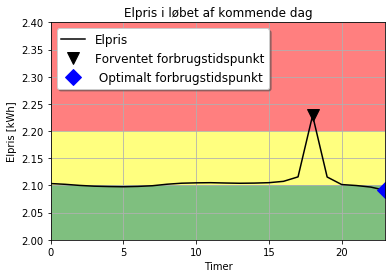

In [133]:
#Want to plot Nordpool price in an easily understandable way to end-user
import matplotlib.dates as mdates



fig, ax = plt.subplots()


ax.plot(df_NP.index, df_NP.values, 'k',label ='Elpris')
ax.plot(result[0].hour,df_NP.iloc[result[0].hour]['Hourly price (DKK)'], "kv",markersize=12,label = 'Forventet forbrugstidspunkt')
ax.plot(opti_Price()[0],opti_Price()[1], "Db",markersize=12, label = ' Optimalt forbrugstidspunkt')

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')


ax.grid()
ax.set_ylabel('Elpris [kWh]')
ax.set_xlabel('Timer')
ax.set_title('Elpris i løbet af kommende dag')
ax.margins(0) # remove default margins (matplotlib verision 2+)
ax.axhspan(2, 2.1, facecolor='green', alpha=0.5)
ax.axhspan(2.1, 2.2, facecolor='yellow', alpha=0.5)
ax.axhspan(2.2, 2.4, facecolor='red', alpha=0.5)


plt.show()